In [288]:
%%capture
# %%capture: Show now output for this cell
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

# https://pydata.github.io/pandas-datareader/
!pip install pandas-datareader
import pandas_datareader as pdr

# Implement stock predictor
For your core stock predictor, implement:

- A training interface that accepts a data range (start_date, end_date) and a list of ticker symbols (e.g. GOOG, AAPL), and builds a model of stock behavior. Your code should read the desired historical prices from the data source of your choice.
- A query interface that accepts a list of dates and a list of ticker symbols, and outputs the predicted stock prices for each of those stocks on the given dates. Note that the query dates passed in must be after the training date range, and ticker symbols must be a subset of the ones trained on.

In [3]:
def get_stock_data_dict(ticker_symbols, start_date, end_date = datetime.today(), date_index = True, columns="all"):
    '''
    Returns stock data from yahoo for the specified ticker symbols, start and end dates.
    A dictionary is returned and the data for each stock can be accessed by data["ticker_symbol"]
    '''
    ticker_symbols = set(ticker_symbols)
    data = {}
    for ticker in ticker_symbols:
        df = pdr.data.DataReader(ticker, 'yahoo', start = start_date, end = end_date)
        if date_index:
            if "Date" in df.columns:
                df.set_index = df["Date"]
        else:
            df["Date"] = df.index
            df.index =  range(1, df.shape[0] + 1)
        if columns != "all":
            if len(columns) > 0:
                for column in df.columns:
                    if column not in columns:
                        df = df.drop([column], axis = 1)
        if df.isnull().sum().sum() != 0:
            print(f"WARN: {df.isnull().sum().sum() } data points are missing for ticker symbol {ticker}")
        data[ticker] = df
    return data

In [158]:
def get_stock_data(ticker_symbols, start_date, end_date = datetime.today(), date_index = True, columns="all"):
    '''
    Returns stock data from yahoo for the specified ticker symbols, start and end dates.
    A dictionary is returned and the data for each stock can be accessed by data["ticker_symbol"]
    '''
    ticker_symbols = set(ticker_symbols)
    df = pd.DataFrame()
    for ticker in ticker_symbols:
        df_ticker = pdr.data.DataReader(ticker, 'yahoo', start = start_date, end = end_date)
        if date_index:
            if "Date" in df_ticker.columns:
                df_ticker.set_index = df_ticker["Date"]
        else:
            df_ticker["Date"] = df_ticker.index
            df_ticker.index =  range(1, df_ticker.shape[0] + 1)
        if columns != "all":
            if len(columns) > 0:
                for column in df_ticker.columns:
                    if column not in columns:
                        df_ticker = df_ticker.drop([column], axis = 1)
        if df_ticker.isnull().sum().sum() != 0:
            print(f"WARN: {df_ticker.isnull().sum().sum() } data points are missing for ticker symbol {ticker}")
        df_ticker["Name"] = ticker
        df = df.append(df_ticker)
    return df

In [159]:
def plot_data(title, df):
    '''
    '''
    ax = df.plot(title = title, fontsize = 12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in $")
    plt.show()

In [160]:
def tickers_as_columns(data_dict, column="Adj Close"):
    '''
    '''
    index = []
    columns = []
    column_names = []
    for key in data_dict:
        column_names.append(key)
        index
        columns.append(data_dict[key][column])
    df = pd.DataFrame(columns, index = column_names).T
  #  df.index = data_dict[key][column].index
    return df

In [261]:
# Define a date range
start_date = datetime(2015, 1, 29)
end_date = datetime.today()

# Define ticker symbols
ticker_symbols = ['GOOG', "AAPL", 'SPY','GLD' ]#,'BTC-USD']

# Create a dataframe with the apple stock price
# df = get_stock_data(ticker_symbols, start_date, end_date, date_index=True, columns=["Adj Close"])

In [230]:
def get_adj_close_df(ticker_symbols, start_date, end_date = datetime.today()):
    ticker_symbols = set(ticker_symbols)
    df = pd.DataFrame()
    for ticker in ticker_symbols:
        column = pdr.data.DataReader(ticker, 'yahoo', start = start_date, end = end_date)["Adj Close"]
        column.name = ticker
        df = pd.concat([df, column], axis = 1)
   # df = pd.DataFrame(data = columns) #, columns=ticker_symbols, index = range(1, len(columns[1])))
    return df

In [265]:
df = get_adj_close_df(ticker_symbols, start_date)
df

,SPY,GLD,AAPL,GOOG
2015-01-29,178.515808,120.760002,26.951370,509.261810
2015-01-30,176.270996,123.449997,26.556961,533.056519
2015-02-02,178.453934,122.419998,26.890163,527.033020
2015-02-03,181.034607,121.050003,26.894701,527.790955
2015-02-04,180.345215,121.580002,27.100969,521.328674
...,...,...,...,...
2021-09-09,448.980011,168.029999,154.070007,2898.270020
2021-09-10,445.440002,167.179993,148.970001,2838.419922
2021-09-13,446.579987,167.740005,149.550003,2869.300049
2021-09-14,444.170013,168.820007,148.119995,2868.120117


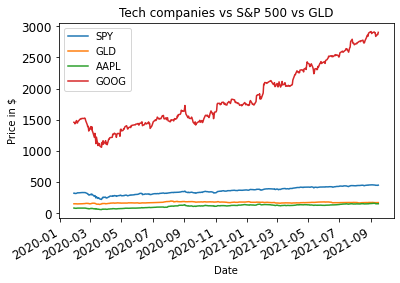

In [234]:
# Get data for multiple ticker symbols
data = get_stock_data(ticker_symbols, start_date)
#formated_data = tickers_as_columns(formated_data)

plot_data(title="Tech companies vs S&P 500 vs GLD", df = df)

In [101]:
def compute_daily_returns(df):
    '''
    Compute and return the daily return values
    '''
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values)-1
    daily_returns.iloc[0, :] = 0 # set daily returns of row 0 to 0
    return daily_returns

In [102]:
daily_returns = compute_daily_returns(formated_data)

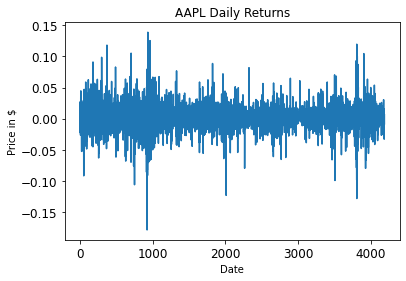

In [103]:
plot_data(title="AAPL Daily Returns", df = daily_returns["AAPL"])

Mean: 0.0013731729405213838; Standard deviation: 0.02079469503990949; Kurtosis: 5.487458019816152


[]

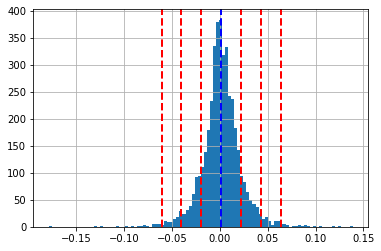

In [88]:
plot = daily_returns["AAPL"].hist(bins=100)
mean = daily_returns["AAPL"].mean()
std = daily_returns["AAPL"].std()
kurtosis = daily_returns["AAPL"].kurtosis()
print(f"Mean: {mean}; Standard deviation: {std}; Kurtosis: {kurtosis}")
plot.axvline(mean, color = 'b', linestyle = 'dashed' , linewidth = 2)
for i in range(1,4):
    plot.axvline(mean + i * std, color = 'r', linestyle = 'dashed' , linewidth = 2)
    plot.axvline(mean - i * std, color = 'r', linestyle = 'dashed' , linewidth = 2)
plot.plot()

<AxesSubplot:>

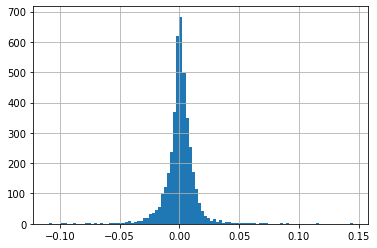

In [89]:
daily_returns['SPY'].hist(bins=100)

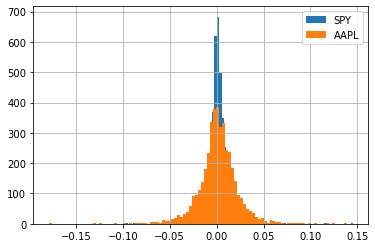

In [90]:
daily_returns['SPY'].hist(bins=100, label="SPY")
daily_returns['AAPL'].hist(bins=100, label="AAPL")
plt.legend(loc='upper right')

<AxesSubplot:>

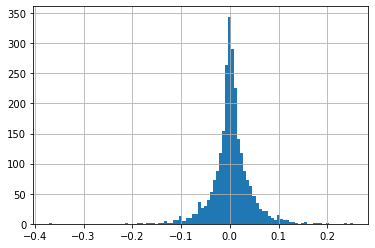

In [106]:
daily_returns['BTC-USD'].hist(bins=100, label="SPY")

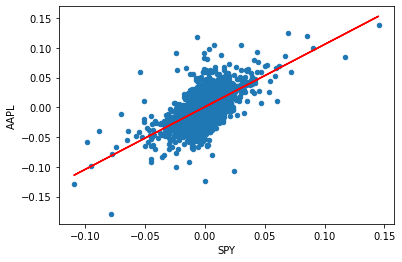

In [109]:
daily_returns.plot(kind='scatter', x='SPY', y='AAPL')
beta_SPY_AAPL, alpha_SPY_AAPL = np.polyfit(daily_returns["SPY"], daily_returns["AAPL"],1)
plt.plot(daily_returns["SPY"], beta_SPY_AAPL * daily_returns["SPY"] + alpha_SPY_AAPL, '-', color='r')
plt.show()

<AxesSubplot:xlabel='GOOG', ylabel='AAPL'>

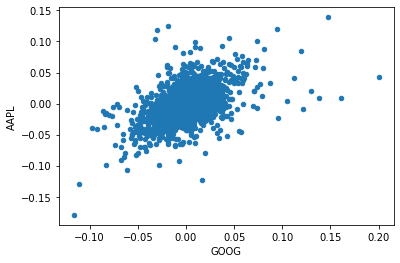

In [104]:
daily_returns.plot(kind='scatter', x='GOOG', y='AAPL')

<AxesSubplot:xlabel='BTC-USD', ylabel='GLD'>

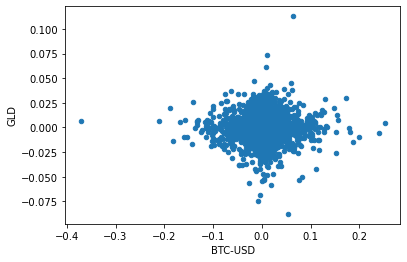

In [105]:
daily_returns.plot(kind='scatter', x='BTC-USD', y='GLD')

In [110]:
daily_returns.corr(method='pearson')

,GLD,SPY,BTC-USD,AAPL,GOOG
GLD,1.000000,0.044042,0.005151,0.003644,0.004121
SPY,0.044042,1.000000,0.027106,0.616844,0.638328
BTC-USD,0.005151,0.027106,1.000000,0.019145,0.003974
AAPL,0.003644,0.616844,0.019145,1.000000,0.526783
GOOG,0.004121,0.638328,0.003974,0.526783,1.000000


# Portfolio analysis

In [266]:
def norm_df(df):
    norm_df = df.copy()
    norm_df = (norm_df / norm_df.iloc[0][:].values)
    return norm_df

In [289]:
def evaluate_portfolio(stock_prices_df, allocation, initial_invest, k = 252, risk_free_return = 0, risk_free_std = 0, print_results=True):
    df_norm = norm_df(stock_prices_df)
    normed_val = df_norm * allocation
    worth = port_val * initial_invest
    portfolio_value = worth.sum(axis=1)
    
    pf_daily_returns = compute_daily_returns(portfolio_value)
    pf_daily_returns = pf_daily_returns[1:]
    
    cum_ret = (portfolio_value[-1] / portfolio_value[0]) - 1
    mean_daily_return = pf_daily_returns.mean()
    std_daily_return = pf_daily_returns.std()
    
    sharp_ratio = (mean_daily_return - risk_free_return) / (std_daily_return - risk_free_std)
    sharp_ratio_annualized = math.sqrt(k) * sharp_ratio
    
    if print_results:
        print(f"Cumulative return: {cum_ret}")
        print(f"Mean daily returns: {mean_daily_return}")
        print(f"Std daily returns: {std_daily_return}")
        print(f"Sharp ratio: {sharp_ratio}")
        print(f"Sharp ratio annualized: {sharp_ratio_annualized}")
    
    return cum_ret, mean_daily_return, std_daily_return, sharp_ratio_annualized

In [290]:
allocation = [0.4, 0.4, 0.1, 0.1]
initial_invest = 1_000_000

cum_ret, mean_daily_return, std_daily_return, sharp_ratio_annualized = evaluate_portfolio(df, allocation, initial_invest)

Cumulative return: 1.6826959696135448
Mean daily returns: 0.0006328005153939862
Std daily returns: 0.009082111461338069
Sharp ratio: 0.0696754843945458
Sharp ratio annualized: 1.1060640251155798


In [291]:
# Considering inflation for the sharpe ratio like this?
cum_ret, mean_daily_return, std_daily_return, sharp_ratio_annualized = evaluate_portfolio(df, allocation, initial_invest, risk_free_return=-0.05)

Cumulative return: 1.6826959696135448
Mean daily returns: 0.0006328005153939862
Std daily returns: 0.009082111461338069
Sharp ratio: 5.575003206130466
Sharp ratio annualized: 88.50043225085386


# Optimizers

In [292]:
import scipy.optimize as spo

In [293]:
def function(X):
    Y = (X - 1.5)**2 + 0.5
    print(f"Y = {Y}; X = {X}")
    return Y

In [297]:
def test_run():
    X_guess = 2
    min_result = spo.minimize(function, X_guess, method="SLSQP", options={'disp': True})
    print(f"Minima found at:")
    print(f" X = {min_result.x}; Y = {min_result.fun}")

In [298]:
test_run()

Y = [0.75]; X = [2.]
Y = [0.75000001]; X = [2.00000001]
Y = [0.75000001]; X = [0.99999999]
Y = [0.5]; X = [1.5]
Y = [0.5]; X = [1.50000001]
Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.5]
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2
Minima found at:
 X = [1.5]; Y = [0.5]


In [299]:
def error(line, data):
    err = np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1]))**2)
    return err

In [ ]:
# Portfolio Optimization


In [ ]:
# Trading considering fees